In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from keras.datasets import mnist
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
tf.random.set_seed(123)

In [4]:
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

In [5]:
num_classes = 10
input_shape = (28, 28, 1)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=input_shape),
                                    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.BatchNormalization(axis=1),
                                    tf.keras.layers.Dropout(0.35),
                                    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

2022-02-05 20:21:39.935012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 20:21:40.050403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 20:21:40.051377: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 20:21:40.052819: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).cache().batch(batch_size).prefetch(buffer_size=AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).cache().batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [9]:
callbacks = [
             tf.keras.callbacks.ReduceLROnPlateau(patience=3),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
            ]

In [12]:
history = model.fit(train_ds, epochs=100, validation_data=test_ds, callbacks=callbacks, 
                    verbose=1)

Epoch 1/100


2022-02-05 20:24:20.375037: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-05 20:24:21.794205: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1875/1875 [==============================] - 29s 11ms/step - loss: 0.6056 - accuracy: 0.8508 - val_loss: 0.1936 - val_accuracy: 0.9799
Epoch 2/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2808 - accuracy: 0.9551 - val_loss: 0.1690 - val_accuracy: 0.9854
Epoch 3/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2342 - accuracy: 0.9670 - val_loss: 0.1621 - val_accuracy: 0.9845
Epoch 4/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2076 - accuracy: 0.9725 - val_loss: 0.1440 - val_accuracy: 0.9886
Epoch 5/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1931 - accuracy: 0.9750 - val_loss: 0.1334 - val_accuracy: 0.9908
Epoch 6/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1806 - accuracy: 0.9783 - val_loss: 0.1268 - val_accuracy: 0.9912
Epoch 7/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1703 - accuracy: 0.9804 - val_loss: 0.1222 - val_

[]

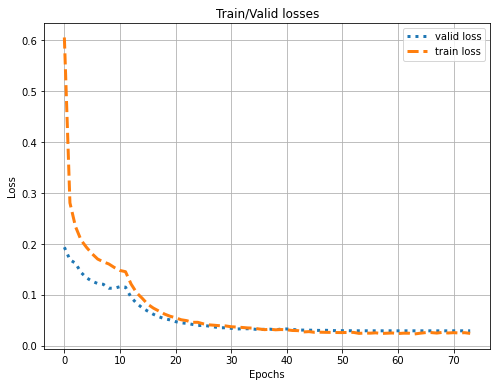

In [33]:
plt.figure(figsize=(8,6))
plt.title('Train/Valid losses')
plt.plot(history.history['val_loss'], label='valid loss', ls=':', lw=3)
plt.plot(history.history['loss'], label='train loss', ls='--', lw=3)
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot()

[]

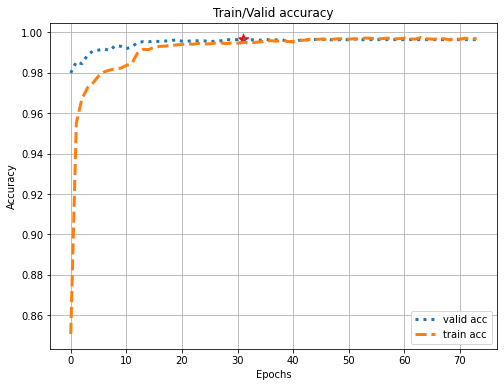

In [32]:
max_acc = max(history.history['val_accuracy'])
ep = history.history['val_accuracy'].index(max_acc)
plt.figure(figsize=(8,6))
plt.title('Train/Valid accuracy')
plt.plot(history.history['val_accuracy'], label='valid acc', lw=3, ls=':')
plt.plot(history.history['accuracy'], label='train acc', lw=3, ls='--')
plt.scatter(ep, max_acc, marker='*', color='red', s=120)
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot()

In [31]:
model.evaluate(test_ds)

313/313 [==============================] - 1s 4ms/step - loss: 0.0293 - accuracy: 0.9964


[0.02934582158923149, 0.996399998664856]